## SMOTE(Synthetic Minority Oversampling Technique)
SMOTE (Synthetic Minority Over-sampling Technique) is a technique used in machine learning to address imbalanced datasets where the minority class has significantly fewer instances than the majority class. SMOTE involves generating synthetic instances of the minority class by interpolating between existing instances.

## Steps in SMOTE
Select an Instance: Choose a random instance from the minority class.
<br>Find Nearest Neighbors: Compute the k-nearest neighbors (k can be adjusted) of the selected instance in the minority class. These neighbors are also from the minority class.
<br>Generate Synthetic Samples: For each selected neighbor, create synthetic samples by interpolating between the selected instance and the neighbor. This can be done by: Synthetic Sample = Instance + random(0, 1) × (Neighbor − Instance). Here, random(0, 1) is a random number between 0 and 1 that helps to determine the position of the synthetic sample along the line connecting the two instances.
<br>Repeat: This process is repeated until the desired number of synthetic samples for the minority class is reached

## The function make_classification() is a utility function provided by the sklearn.datasets module in the Scikit-learn library. It is commonly used to generate a synthetic dataset for classification tasks, particularly useful for testing and benchmarking machine learning algorithms. Here’s a detailed breakdown of what this function does, its parameters, and an example of how to use it.

### Overview of make_classification()
Purpose: The primary purpose of make_classification() is to create a multi-class or binary classification dataset with specific properties, allowing users to experiment with different classification models without the need for real-world data.
<br>Output: The function returns a tuple containing:
<br>X: A NumPy array representing the feature matrix.
<br>y: A NumPy array representing the target variable (class labels).

### Key Parameters
n_samples: Number of samples (rows) to generate. Default is 100.
<br> n_features: Total number of features (columns) for each sample. Default is 20.
<br> n_informative: Number of informative features (features that actually affect the outcome). Default is 2.
<br> n_redundant: Number of redundant features (linear combinations of the informative features). Default is 2.
<br> n_clusters_per_class: Number of clusters per class. Default is 2.
<br> weights: Proportions of samples assigned to each class. Default is None, which means classes are balanced.
<br> flip_y: Fraction of samples whose class is randomly exchanged. Default is 0 (no noise).
<br> random_state: Controls the randomness of the dataset generation. Setting this allows for reproducibility

In [8]:
from sklearn.datasets import make_classification

x, y = make_classification(
    n_samples=1000, # total no. of samples(data points) to generate
    n_features=2, # the total number of features (input variables) for each sample
    n_redundant=0,
    n_clusters_per_class=1, # there will be 1 cluster for each class
    weights=[0.90], # 90% of the generated samples will belong to the majority class (Class 0), and the remaining 10% will belong to the minority class (Class 1)
    random_state=1
)

# x is independent feature, while y is dependent feature

In [10]:
print(x, y)

[[ 1.53682958 -1.39869399]
 [ 1.55110839  1.81032905]
 [ 1.29361936  1.01094607]
 ...
 [-0.55662536 -0.15983725]
 [ 1.00499902  0.93628981]
 [ 1.46210987  1.14497791]] [1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 

In [12]:
import pandas as pd

df1 = pd.DataFrame(x, columns=['f1', 'f2'])
df2 = pd.DataFrame(y, columns=['target'])

final_df = pd.concat([df1, df2], axis=1)
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [14]:
final_df['target'].value_counts()

target
0    894
1    106
Name: count, dtype: int64

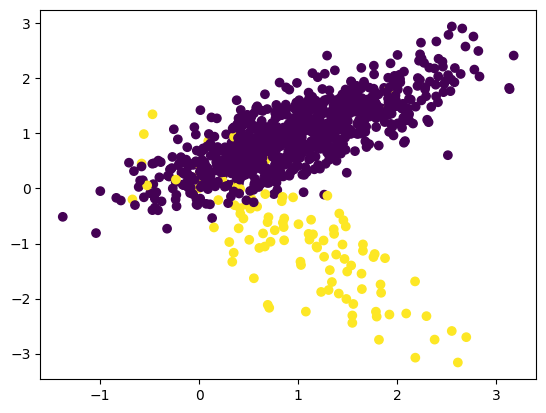

In [18]:
import matplotlib.pyplot as plt

#plt.scatter(x, y, **kwargs)
plt.scatter(final_df['f1'], final_df['f2'], c=final_df['target'])

In [31]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
u, v = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

print(u, v)

            f1        f2
0     1.536830 -1.398694
1     1.551108  1.810329
2     1.293619  1.010946
3     1.119889  1.632518
4     1.042356  1.121529
...        ...       ...
1783  2.330916 -2.354948
1784 -0.561784  0.598920
1785  1.761542 -1.245760
1786  0.013373  0.154846
1787  0.021900 -0.025498

[1788 rows x 2 columns] 0       1
1       0
2       0
3       0
4       0
       ..
1783    1
1784    1
1785    1
1786    1
1787    1
Name: target, Length: 1788, dtype: int32


### <u>1. oversample = SMOTE():</u>
This line initializes a SMOTE object from the imblearn library (which must be imported separately). SMOTE is an oversampling technique that generates synthetic samples for the minority class in an imbalanced dataset.
SMOTE works by creating synthetic examples of the minority class based on the existing data. It does this by selecting instances of the minority class, finding their nearest neighbors, and generating new samples that are interpolated between these instances.
<br> Key Parameters (optional): While not specified in this example, SMOTE() can accept several parameters, such as:
<br> sampling_strategy: Specifies the desired balance between classes (default is to balance all classes).
<br> k_neighbors: The number of nearest neighbors to use when generating synthetic samples (default is 5).
<br> random_state: Controls the randomness of the process, ensuring reproducibility.

### <u>2. u, v = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target']):</u>
This line calls the fit_resample() method on the SMOTE object oversample. It takes two arguments:
<br> final_df[['f1', 'f2']]: This is a DataFrame that contains the features (predictor variables) used to generate the synthetic samples. In this case, it consists of two features: f1 and f2.
<br> final_df['target']: This is a Series containing the target variable (class labels) that you want to balance. It indicates the class (e.g., 0 for majority class, 1 for minority class).

### What Happens Inside fit_resample():
The method performs two main tasks:
<br> Fit: It examines the feature set and the target labels to determine the distribution of classes.
<br> Resample: It generates synthetic samples for the minority class based on the nearest neighbors of the minority class instances.
<br> The output of this method is two arrays:
<br> u: The new feature set after applying SMOTE, which contains both the original and the synthetic samples.
<br> v: The corresponding target labels for the synthetic and original samples.

### Resulting Outputs
After the execution of the fit_resample() method:
<br> u: This will be a NumPy array or a DataFrame containing the resampled feature set. The number of rows in u will be larger than the original feature set if synthetic samples were generated.
<br> v: This will be a NumPy array or a Series containing the target labels corresponding to the features in u. It will reflect the class distribution after oversampling

### Step-by-Step Process of fit_resample()
#### 1. Fit the Model:
Analyze the Input Data: The method first examines the feature set (input data) and the target labels (output) to understand the distribution of the classes. It identifies the majority and minority classes in the target variable. For instance, if you have two classes, say 0 (majority) and 1 (minority), the method checks how many instances belong to each class.

#### 2. Generate Synthetic Samples:
##### Determine Nearest Neighbors:
For each instance in the minority class, the method finds its k nearest neighbors (default is 5). This is based on the distance metric (usually Euclidean distance) used in the feature space.
##### Create Synthetic Instances:
New samples are created by interpolating between existing minority class instances and their neighbors. For each minority instance:
Randomly select one or more of its nearest neighbors.
Generate synthetic points along the line segment joining the instance and its neighbors. This is done by taking a weighted average of the coordinates of the instance and its neighbors.
The number of synthetic samples generated can be controlled by the sampling_strategy parameter, allowing you to specify how balanced you want the classes to be after resampling.
#### 3. Return Resampled Data:
The method returns the new feature set and the corresponding target labels:
<br> New Feature Set (u): This contains the original samples plus the newly generated synthetic samples.
<br> New Target Labels (v): This contains the target labels for both the original and synthetic samples, reflecting the new class distribution

In [34]:
len(v[v==0])

894

In [36]:
df1_oversampled = pd.DataFrame(u, columns=['f1', 'f2'])
df2_oversampled = pd.DataFrame(v, columns=['target'])

oversampled_df = pd.concat([df1_oversampled, df2_oversampled], axis=1)
oversampled_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,2.330916,-2.354948,1
1784,-0.561784,0.598920,1
1785,1.761542,-1.245760,1
1786,0.013373,0.154846,1


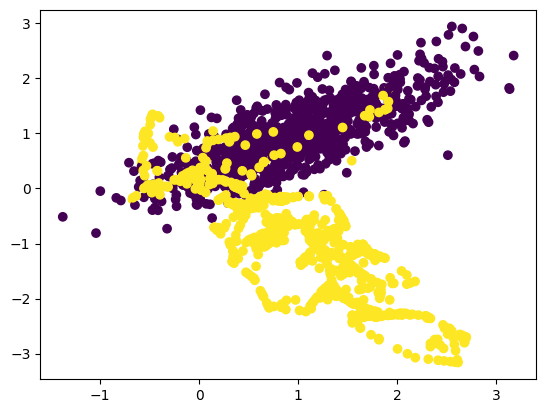

In [38]:
plt.scatter(oversampled_df['f1'], oversampled_df['f2'], c=oversampled_df['target'])